# Numerical Methods
Now we're at a level where we can import and manipulate data for visualization but many of our applications will require  more specialised analysis and data processing. The main package that allows this is SciPy. It contains many numerical routines and algorithms that can be called as high level functions, making life a lot easier for scientists. Here we'll introduce some of the areas that SciPy covers. 

Like matplotlib, SciPy is arranged into submodules for different applications and these need to be imported separately. Only the most common functions are made available from the SciPy namespace. Let's set up our notebook and then start exploring SciPy's modules.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# matplotlib often gives non-fatal warnings following a recent numpy update.
# They will be removed in the next version of matplotlib. For now they
# don't matter, so let's turn off warnings.
import warnings
warnings.filterwarnings('ignore')

### Optimize
This is a [package of algorithms](https://docs.scipy.org/doc/scipy/reference/optimize.html#module-scipy.optimize) for general optimisation routines including things like root finding, minisation, and probably most importantly, curve fitting. The function I expect you'll use most frequently is `scipy.optimize.curve_fit()` which is a least squares optimisation based on the Levenberg-Marquardt algorithm and is suitable for most commonly encountered functions, including non-linear functions, provided you have good guesses to initialise the algorithm.

[ 2.55767697  1.41300969  0.50175704]
[[ 0.01599159  0.00734054 -0.00067645]
 [ 0.00734054  0.02120882  0.00515809]
 [-0.00067645  0.00515809  0.00256031]]


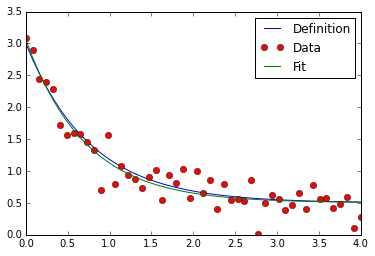

In [2]:
from scipy import optimize

# Define the function that you want to fit to the data
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

# Simulate some data
x_data = np.linspace(0, 4, 50) # generate some x values
y = func(x_data, 2.5, 1.3, 0.5) # use the function to generate y values given a, b, and c
y_data = y + 0.2 * np.random.normal(size=len(x_data)) # add noise to simulate experimental conditions

p0 = [2,1,1] # list of initial guesses at the parameters a, b, and c

popt, pcov = optimize.curve_fit(func, x_data, y_data, p0)
# popt is an array of fitted parameters, in this a, b, and c
# pcov is an array covariances

print(popt)
print(pcov)

# Create array of fitted y-values based on output from curve_fit
y_fit = func(x_data, popt[0], popt[1], popt[2])

plt.plot(x_data, y, label = 'Definition') # Definition of curve we want to recover
plt.plot(x_data, y_data,'ro', label = 'Data') # Simulated experimental data
plt.plot(x_data, y_fit, label = 'Fit') # Simulated experimental data
plt.axis([0,4,0,3.5])
plt.legend(loc=0)

### Interpolation
When you have data that's not spaced on its axis exactly how you need it for your analysis, SciPy let's you interpolate it with tools from the `interpolate` [submodule](https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html). Two common methods to interpolate data are to use lines or splines to estimate the values between real data points. To generate interpolated data you first create an interpolation object from the original data, in this case with the `interp1d()` function. The interpolation object behaves like a function that takes new x-values as its argument to generate interolated y-values.

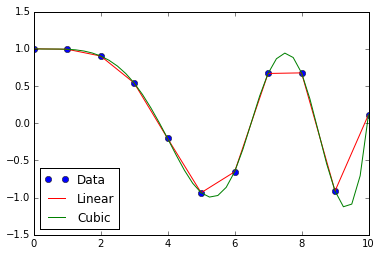

In [3]:
from scipy import interpolate

# Define data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

# Create interpolation objects with different interpolation methods
f = interpolate.interp1d(x, y, kind='linear')
f2 = interpolate.interp1d(x, y, kind='cubic')

# Define new interpolation points and interpolate data
x_new = np.linspace(0, 10, num=41)
y_new_lin = f(x_new)
y_new_cub = f2(x_new)

# Plot data
plt.plot(x,y,'bo', label='Data')
plt.plot(x_new,y_new_lin, c='r', label='Linear')
plt.plot(x_new,y_new_cub, c='g', label='Cubic')
plt.legend(loc='best')

Interpolation can expanded to bivariate data using the `interp2d()` function.

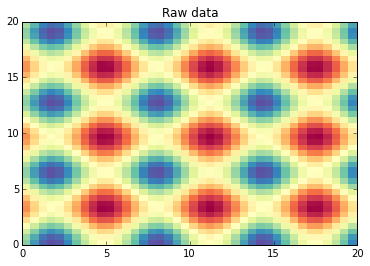

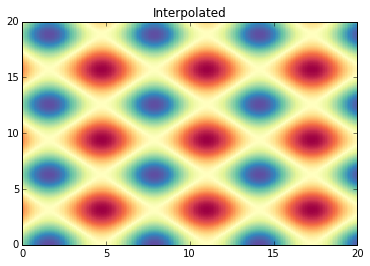

In [4]:
# Create x, y, and z data
x = np.arange(0,20.5,0.5)
y = np.arange(0,20.5,0.5)
x, y = np.meshgrid(x,y)
z = np.sin(x) + np.cos(y)

# Create 2D interpolation object
f = interpolate.interp2d(x,y,z,kind='cubic')

# Create data to interpolate over and then interpolate
x_new = np.arange(0,20.1,0.1)
y_new = np.arange(0,20.1,0.1)
z_new = f(x_new,y_new)

# Plot figures
plt.figure(0)
plt.pcolor(x,y,z,cmap='Spectral')
plt.title('Raw data')

plt.figure(1)
plt.pcolor(x_new,y_new,z_new,cmap='Spectral')
plt.title('Interpolated')

### Calculus
SciPy's `integrate` [package](https://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) includes several numerical routines for integration and solving ordinary differential equations (ODE's). ODE's require moderate moderate amounts of code, too much for what we want to achieve here. But if you want to learn more about SciPy's ODE solving capabilities I recommend you try this tutorial for modelling a zombie apocalypse.

For integration, there are functions for finding the integrals of function arguments or data arguments. We can show examples for both.

In [5]:
from scipy import integrate

def func(x):
    return x**2

y_quad = integrate.quad(func,0,4) # Definite integral from function definition
y_an = 4**3 / 3

y_quad, y_an

((21.333333333333336, 2.368475785867001e-13), 21.333333333333332)

In [6]:
x = np.arange(0,4.1,0.1)
y = x**2

y_simps = integrate.simps(y,x) # Definite integral of data using Simpson's method

y_simps, y_an

(21.333333333333329, 21.333333333333332)

As far as I've found, SciPy doesn't have any functions for numerical differentiation. I think this is because there are no universal fail-safe methods that are stable enough for all classes of problems. However, NumPy can calculate the central finite-difference approximation to the derivative of a function $f(x)$ with data pointing spacing $h$. 

$$\frac{df(x)}{dx} \approx \frac{f(x+h) - f(x-h)}{2h}$$

This can give a good approximation assuming $h$ is small enough and the function is smooth.

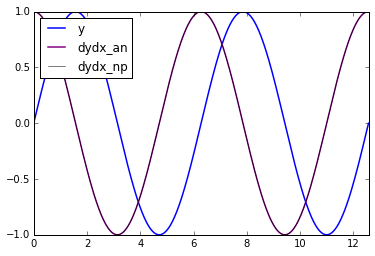

In [7]:
x = np.arange(0,4*np.pi+np.pi/100,np.pi/100)
y = np.sin(x)
dx = np.gradient(x) # Creates an array of differences between x-values divided by one
dydx_np = np.gradient(y, dx) # Centred difference method numerical derivative
dydx_an = np.cos(x) # Analytical derivative of sin(x)

plt.plot(x,y, label='y', lw=1.5)
plt.plot(x,dydx_an, label='dydx_an',c='purple',lw=1.5)
plt.plot(x,dydx_np, label='dydx_np',c='black',lw=0.5)
plt.axis([min(x),max(x),min(y),max(y)])
plt.legend(loc=2)

### Stats
The `stats` [submodule](https://docs.scipy.org/doc/scipy/reference/stats.html) contains lots of common statistical distributions and statistical functions. We can call any of the built-in continuous or discrete distributions and get information about them using generic methods. For example, let's investigate the generalised [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution).

2.671637036974072 0.564895635468333 0.40139240082970745 0.16386096720106735
5.1728613455 1.62670822057 0 1


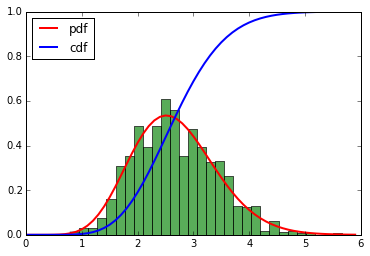

In [8]:
from scipy import stats

# Paramterise the distribution
x = np.arange(0,6.,0.1)
a = 5
c = 1.6

# Calculate distribution functions
pdf = stats.gengamma.pdf(x,a,c) # Probability density function for Maxwell distribution
cdf = stats.gengamma.cdf(x,a,c) # Cumulative density function for Maxwell distribution

# Get descriptive statistics
mean,var,skew,kurt = stats.gengamma.stats(a,c,moments='mvsk') 
print(mean,var,skew,kurt)

# Sample random variables from the distribution and get descriptive statistics
r = stats.gengamma.rvs(a,c,size=1000)

# Fit the distribution to the data to get parameter estimates
fa, fc, floc, fscale = stats.gengamma.fit(r, floc=0, fscale=1)
print(fa, fc, floc, fscale) 

plt.hist(r, 30, normed=True, facecolor='green', histtype='bar', alpha=0.65)
plt.plot(x, pdf, label='pdf', lw=2.0, color='red')
plt.plot(x, cdf, label='cdf', lw=2.0, color='blue')
plt.legend(loc=2)

The stats module also has some functions that operate on data so we can get further information about it.

In [9]:
# Summary of descriptive statistics
print(stats.describe(r))

# Standard error in the mean
print(stats.sem(r))

# Test whether sample is taken from the normal distribution
print(stats.normaltest(r))

DescribeResult(nobs=1000, minmax=(0.79373005449690137, 5.6624326882636788), mean=2.6843466209517008, variance=0.53587437119720516, skewness=0.3739757755331099, kurtosis=-0.0878707128859082)
0.0231489604777
NormaltestResult(statistic=22.428357918698595, pvalue=1.3481678271867879e-05)


### Fourier Transforms
Fourier transforms are a standard standard methods for converting data between, for example, the time and frequency domains. `fftpack` contains the numerical methods for different forms of [fourier and inverse fourier transforms](https://docs.scipy.org/doc/scipy/reference/fftpack.html).

[0, 300, 0, 2.1]

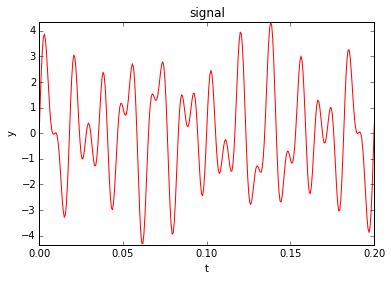

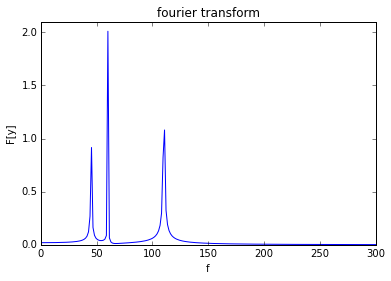

In [10]:
from scipy import fftpack

# time data
N = 1200 # Number of samples
T = 1 / 1600 # Sample spacing
t = np.linspace(0,N*T,N) # time points
w1 = 2*np.pi*45 # angular frequency
w2 = 2*np.pi*60
w3 = 2*np.pi*110
y = np.sin(w1*t) + 2*np.sin(w2*t) + 1.5*np.sin(w3*t)

# Fourier transform data
f = np.linspace(0.0, 1.0/(2.0*T), N/2)
yf = fftpack.fft(y)

# Plot  figures
plt.figure(0)
plt.plot(t,y,'r')
plt.xlabel('t')
plt.ylabel('y')
plt.title('signal')
plt.axis([0,0.2,min(y),max(y)])

plt.figure(1)
plt.plot(f, 2.0/N * np.abs(yf[0:N/2]),'b')
plt.xlabel('f')
plt.ylabel('F[y]')
plt.title('fourier transform')
plt.axis([0,300,0,2.1])

### Signal Processing
Beyond fourier analysis, we often want to filter, smooth, convolute etc. our data before we can get the information we need from our raw signals. Here are three examples from the `signal()` [submodule](https://docs.scipy.org/doc/scipy/reference/signal.html).

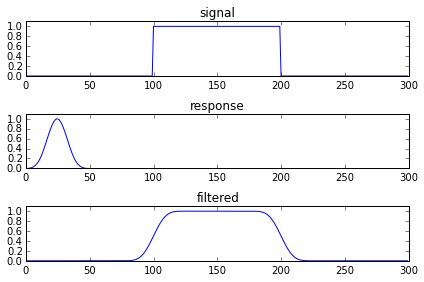

In [11]:
from scipy import signal

# Convolution

# Define signal, response, and convoluted data
sig = np.repeat([0., 1., 0.], 100) # Constructs an array by repeating the elements of the list, e.g. 100 times. 
response = signal.parzen(50)
filtered = signal.convolve(sig, response, mode='same') / sum(response)

# Plot graphs
plt.subplot(3,1,1)
plt.plot(sig)
plt.title('signal')
plt.axis([0,len(sig),0,1.1])

plt.subplot(3,1,2)
plt.plot(response)
plt.title('response')
plt.axis([0,len(sig),0,1.1])

plt.subplot(3,1,3)
plt.plot(filtered)
plt.title('filtered')
plt.axis([0,len(sig),0,1.1])

plt.tight_layout()

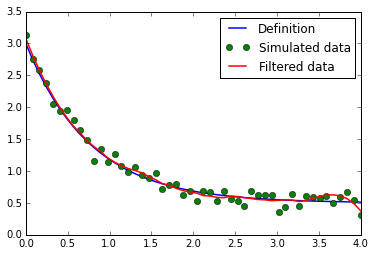

In [12]:
# Filtering

# Define the function for the signal
def func(x, a, b, c):
     return a * np.exp(-b * x) + c

# Simulate some data
x_data = np.linspace(0, 4, 50) # generate some x values
y = func(x_data, 2.5, 1.3, 0.5) # use the function to generate y values given a, b, and c
y_data = y + 0.1 * np.random.normal(size=len(x_data)) # add noise to simulate experimental conditions

# Apply Savitzky-Golay noise filter, 15 point window, polynomial degree 3
y_sg = signal.savgol_filter(y_data, 15, 3)

# Plot data
plt.plot(x_data,y, label='Definition', lw=1.5)
plt.plot(x_data,y_data,'go', label='Simulated data')
plt.plot(x_data,y_sg, 'r', label='Filtered data', lw=1.5)
plt.legend()

In [13]:
# Peak finding

x = np.arange(0, 4*np.pi+np.pi/40, np.pi/40)
y = np.sin(x)
peaks = signal.find_peaks_cwt(y, np.arange(1,20))

print(x[peaks])
print([np.pi/2,2*np.pi+np.pi/2])

[ 1.57079633  7.85398163]
[1.5707963267948966, 7.853981633974483]


### Special functions
These are a set of functions encountered in mathematical physics. The functions available in the submodule include airy, elliptic, bessel, gamma, beta, hypergeometric, parabolic cylinder, mathieu, spheroidal wave, struve, and kelvin, as well as some of their derivatives and integrals. The full reference is [here](https://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special).

For example we can look at the [Airy function](https://en.wikipedia.org/wiki/Airy_function) which is a solution to the differential equation 

$$\frac{d^{2}y}{dx^{2}} - xy = 0$$

This is useful, for example, as the solution to Schr&#x00F6;dinger's equation for a particle in a triangular potential well. Here's how to code it.

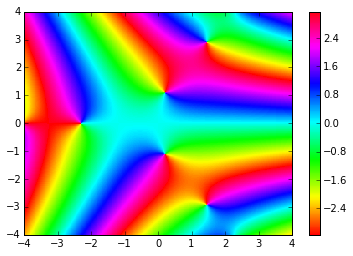

In [14]:
from scipy import special

x = np.arange(-4,4.025,0.025)
y = np.arange(-4,4.025,0.025)
x, y = np.meshgrid(x,y)
z = special.airy(x + 1j*y)[3] # The function returns a tuple of Ai, Bi, and they derivatives. We only want Ai.
arg = np.angle(z)

plt.pcolor(x,y,arg,cmap='hsv')
plt.colorbar()

## Further reading
As usual I would recommend the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/index.html). It covers loads more than we've had time to look at here and shoould be your first port of call when finding out how to implement a numerical method in your data analysis.